## 1. Obtain data

### 1.1. Scenario

- Context: A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 dollar which is 999 dollar on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.
- Objective: The superstore wants to predict the likelihood of the customer giving a positive response and wants to identify the different factors which affect the customer's response. The dataset has 2240 rows and 22 columns, whose name is "superstore_data.csv". We will use machine learning classification model (Logistic Regression) to achieve this goal.

### 1.2. Dataset

#### This data was gathered during last year's campaign.
- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from sklearn.metrics import RocCurveDisplay

In [2]:
data = pd.read_csv('superstore_data.csv')
data.info()
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0


In [4]:
data.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [6]:
data.shape

(2240, 22)

## 2. Scrub data

### 2.1. Find Missing Values

In [8]:
data.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [9]:
data = data.dropna(subset='Income')

In [10]:
data.shape

(2216, 22)

### 2.2. Find duplicated values

In [12]:
data['Id'].duplicated().sum()

0

### 2.3. Plot check and replace columns name

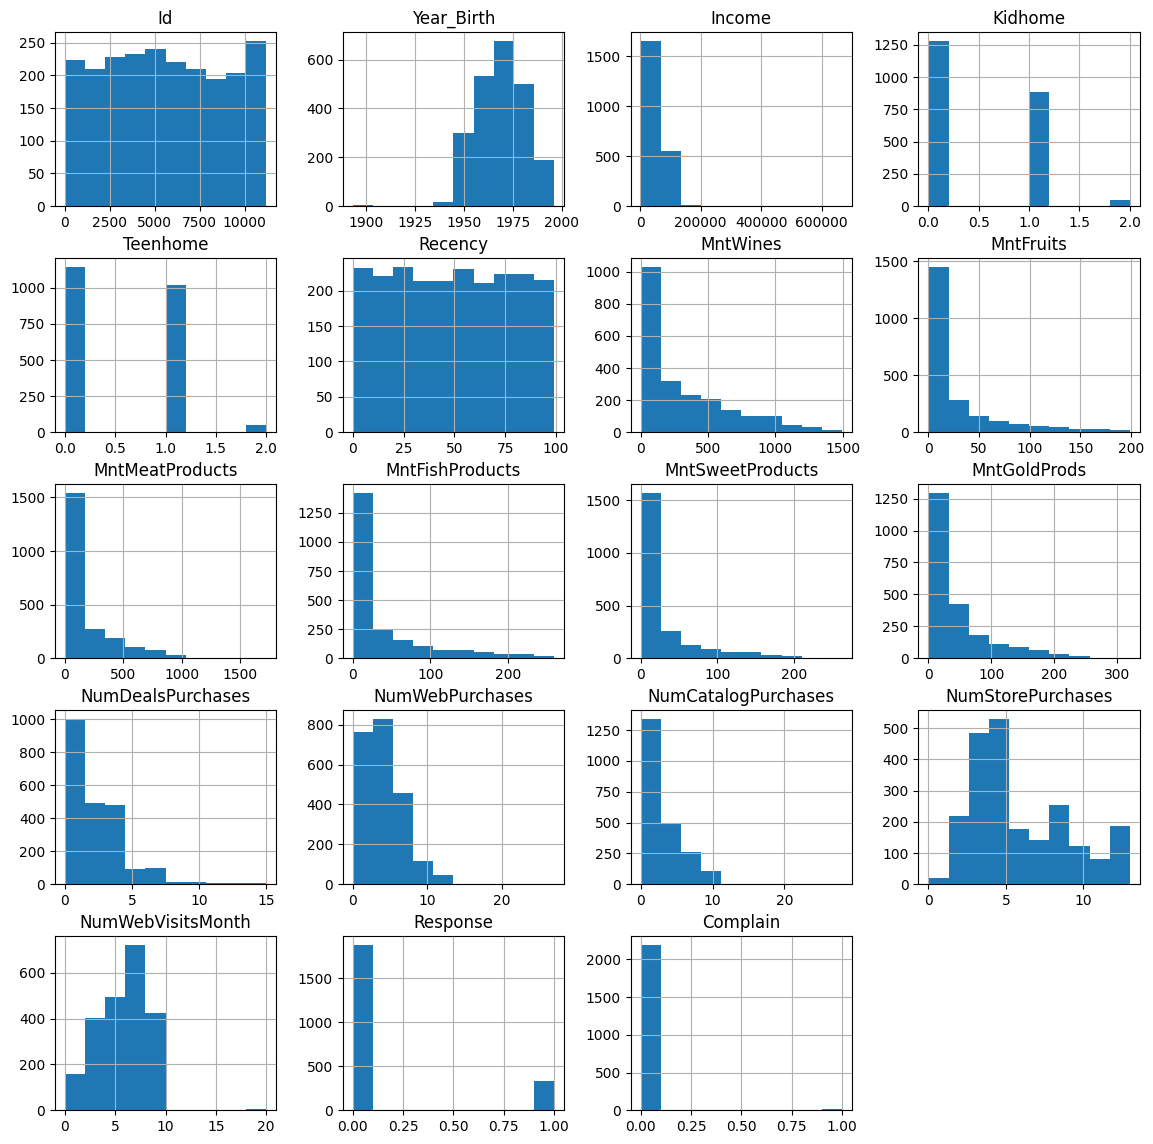

In [14]:
data.hist(figsize = (14,14))
plt.show()

In [15]:
df = data.copy()

#### 2.3.1. Response column

In [16]:
print(df['Response'].dtypes)

int64


In [17]:
df['Response'] = df['Response'].astype(str)
df['Response'] = df['Response'].replace(['1'], ['Accept'])
df['Response'] = df['Response'].replace(['0'], ['Refuse'])
df['Response'].value_counts()

Response
Refuse    1883
Accept     333
Name: count, dtype: int64

<Axes: xlabel='Response', ylabel='Count'>

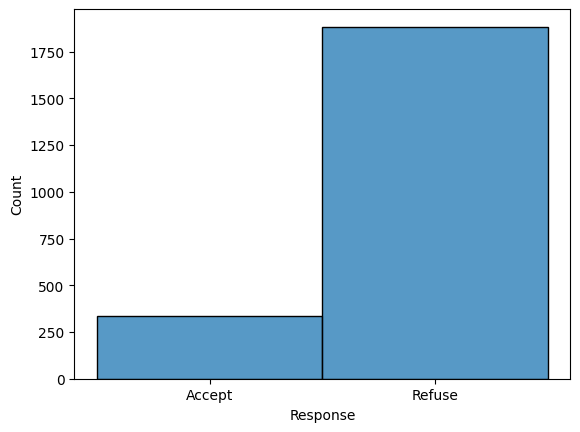

In [20]:
sns.histplot(df,x='Response')

#### 2.3.2. Complain column

In [21]:
print(df['Complain'].dtypes)

int64


In [23]:
df['Complain'] = df['Complain'].astype(str)
df['Complain'] = df['Complain'].replace(['1'], ['Yes'])
df['Complain'] = df['Complain'].replace(['0'], ['No'])
df['Complain'].value_counts()

Complain
No     2195
Yes      21
Name: count, dtype: int64

<Axes: xlabel='Complain', ylabel='Count'>

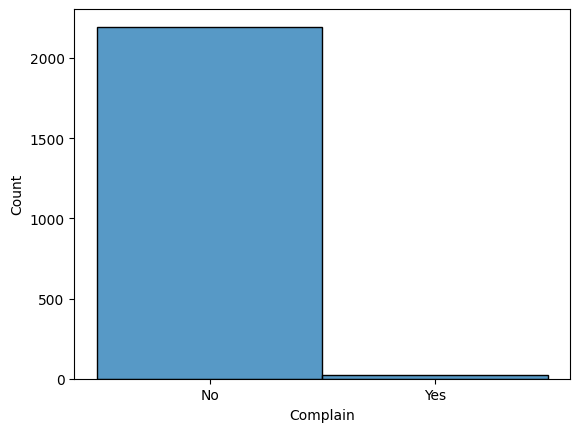

In [24]:
sns.histplot(df, x='Complain')

## 3. Explore data

### 3.1. Income Range

#### 3.1.1. Income Distribution 

Text(0.5, 1.0, 'Income Distribution')

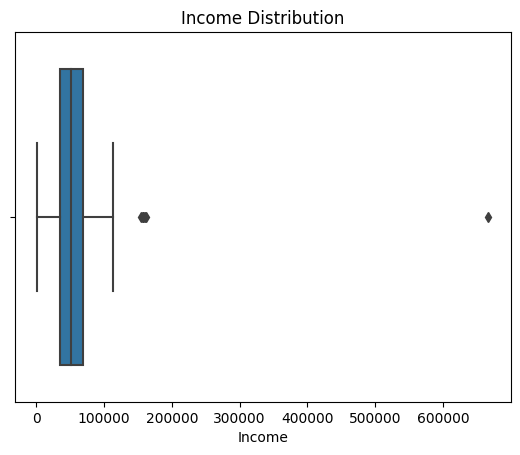

In [26]:
ax = sns.boxplot(df, x='Income')
ax.set_title('Income Distribution')

#### 3.1.2. Income range between Accept and Refuse in the last campaign

Text(0.5, 1.0, ' Income range between Accept and Refuse in the last campaign')

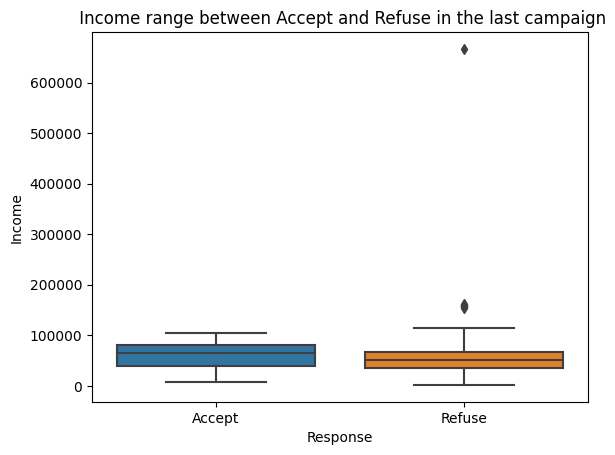

In [28]:
ax = sns.boxplot(df, y='Income', x='Response')
ax.set_title(' Income range between Accept and Refuse in the last campaign')

### 3.2. Percentage of Complain in the last campaign

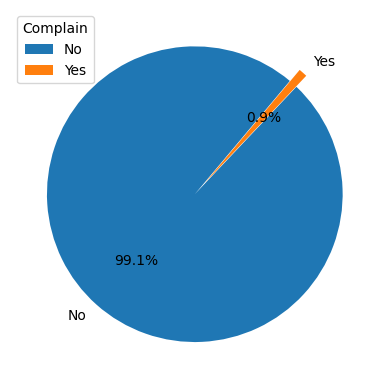

In [34]:
plt.pie(df['Complain'].value_counts(),
        labels=['No', 'Yes'],
        autopct = '%1.1f%%',
        explode = (0, 0.1),
        startangle = 50)

plt.legend(title='Complain')
plt.show()

### 3.3. Percentage of Response in the last campaign

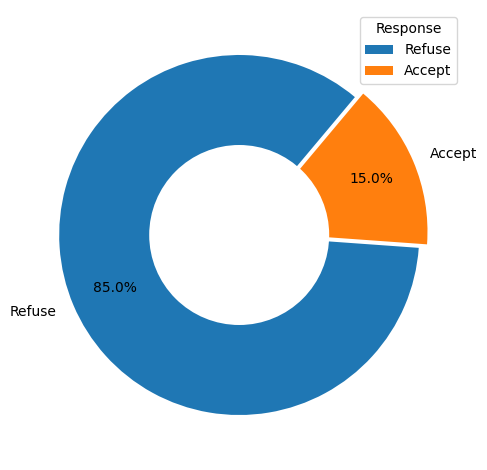

In [39]:
plt.pie(df['Response'].value_counts(),
        labels=['Refuse', 'Accept'],
        autopct = '%1.1f%%',
        explode = (0, 0.05),
        startangle = 50,
        pctdistance = 0.75)

circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(circle)

plt.legend(title='Response')
plt.tight_layout()
plt.show()

### 3.4. Response and People profile

In [41]:
people_profile = ['Education', 'Marital_Status','Kidhome', 'Teenhome', 'Complain']

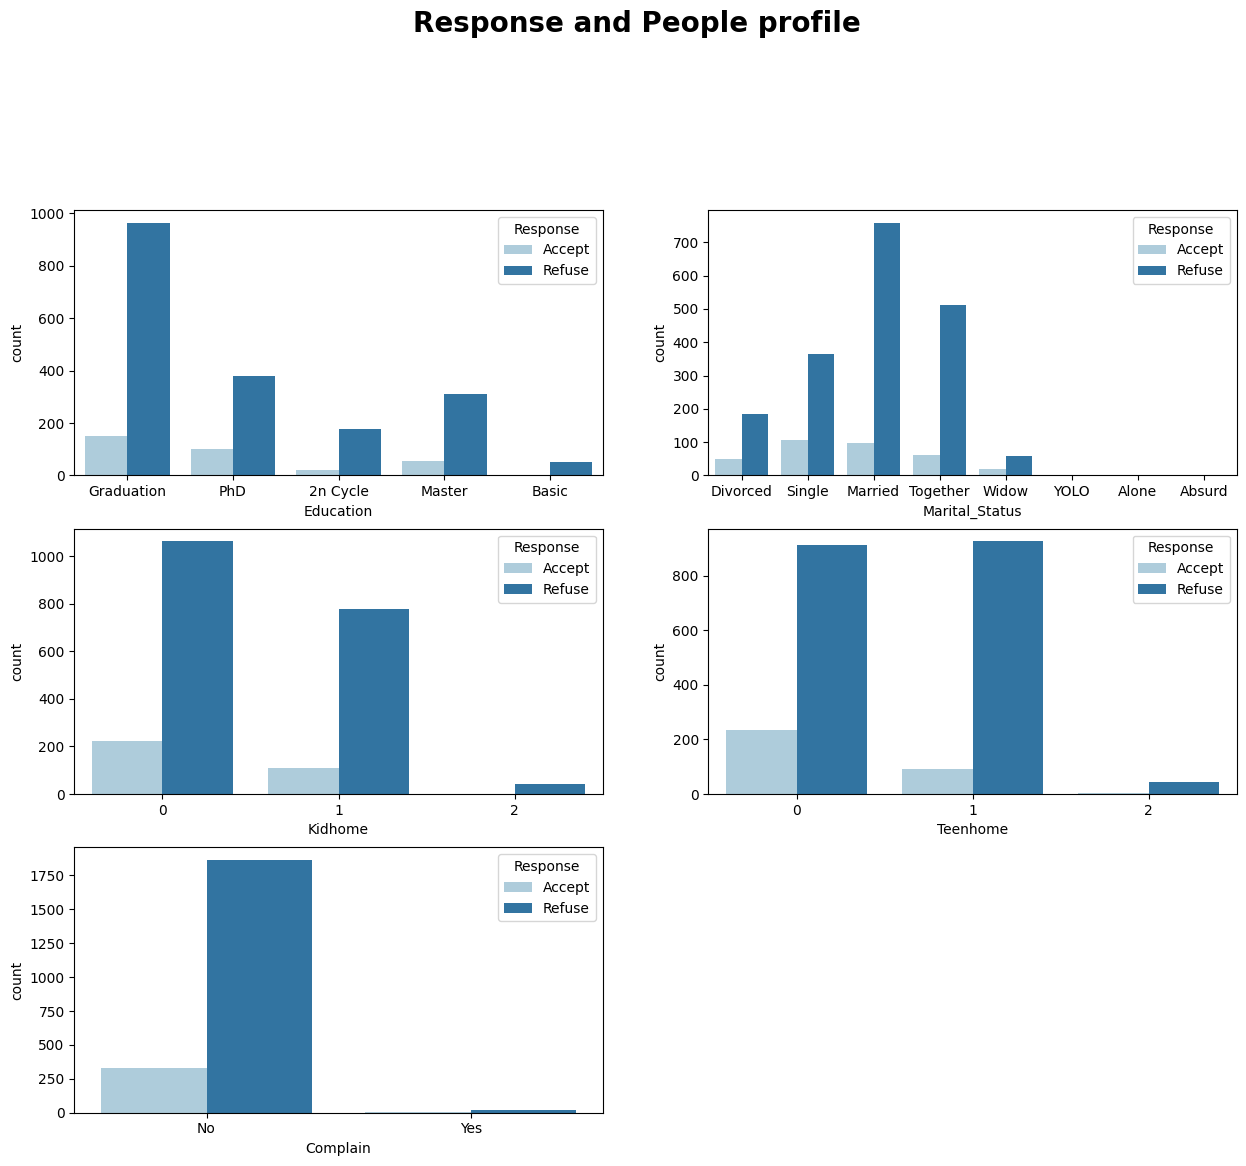

In [44]:
plt.figure(figsize=(15,20))
plt.suptitle('Response and People profile', fontweight='bold', fontsize=20)
for i in range(len(people_profile)):
    plt.subplot(5,2,i+1)
    sns.countplot(df, x=people_profile[i], hue='Response', palette='Paired')

### 3.5. People interact

In [46]:
peo_interact = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

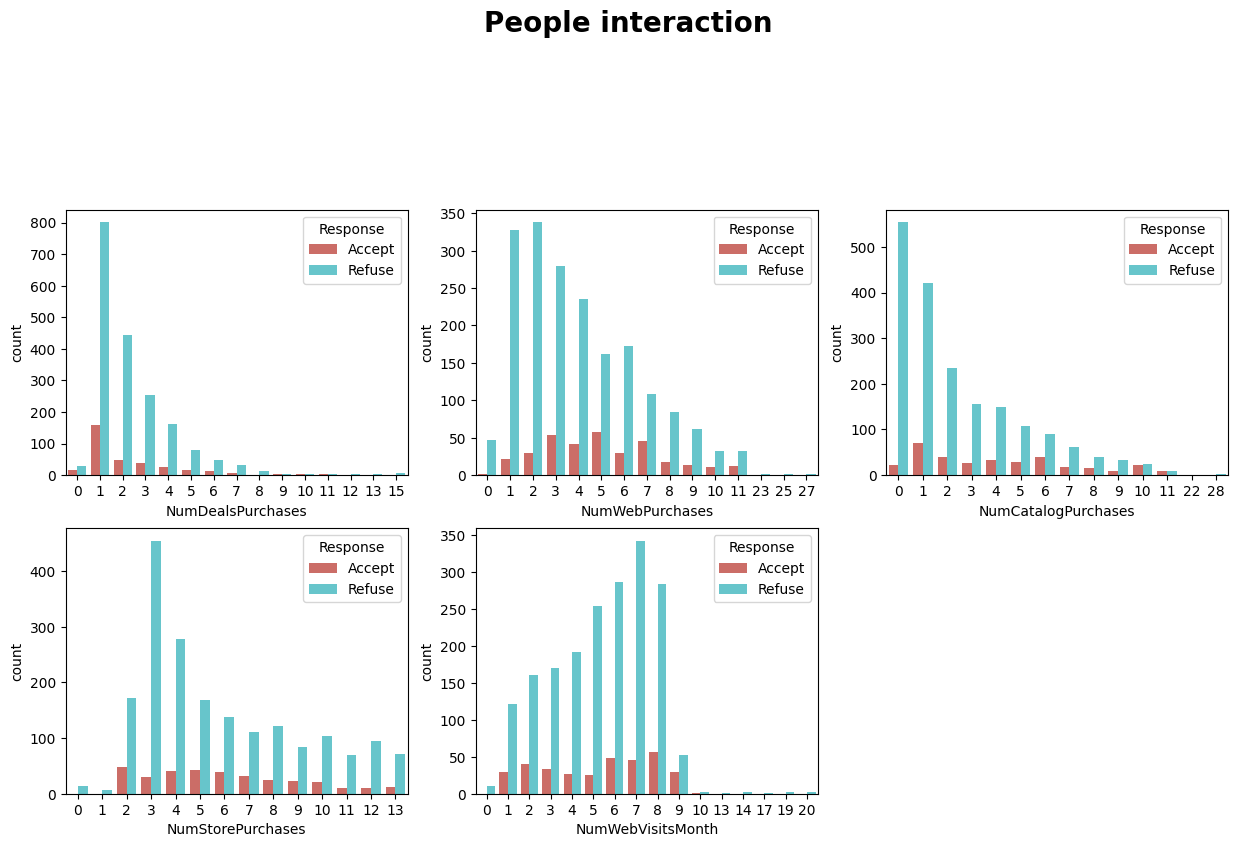

In [48]:
plt.figure(figsize=(15,20))
plt.suptitle('People interaction', fontweight='bold', fontsize=20)
for i in range(len(peo_interact)):
    plt.subplot(5,3,i+1)
    sns.countplot(df, x=peo_interact[i], hue='Response', palette='hls')

### 3.6. Response and products amount

In [50]:
pros_amount = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

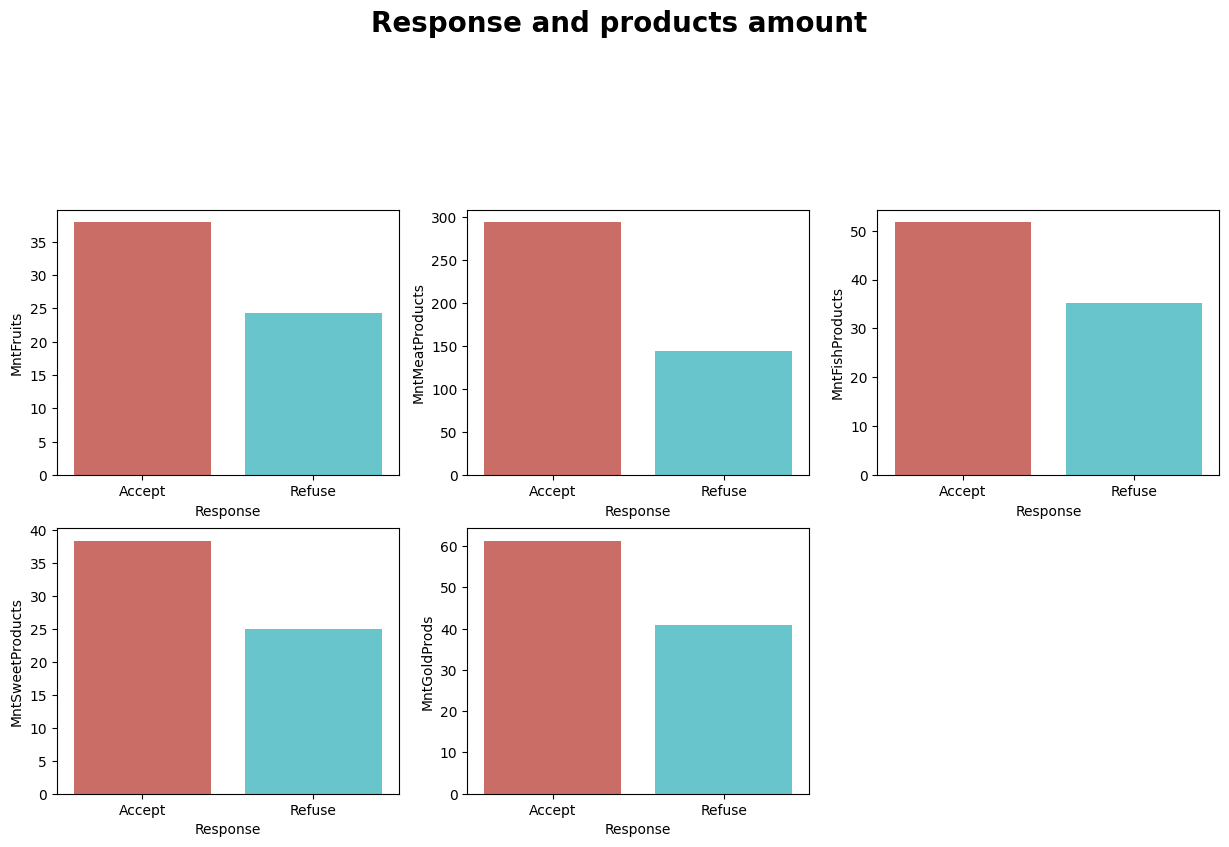

In [53]:
plt.figure(figsize=(15,20))
plt.suptitle('Response and products amount', fontweight='bold', fontsize=20)
for i in range(len(pros_amount)):
    plt.subplot(5,3,i+1)
    sns.barplot(df, y=pros_amount[i], x='Response', palette='hls', errorbar=None)

### 3.7. Number of days since the last purchase

In [54]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

Text(0.5, 1.0, 'Number of days since the last purchase')

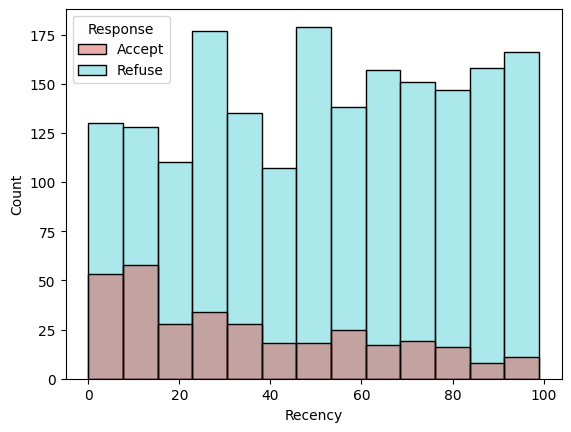

In [58]:
sns.histplot(df, x='Recency', hue='Response', palette='hls')
ax.set_title('Number of days since the last purchase')

Text(0.5, 1.0, 'Income versus Response marketing campaign')

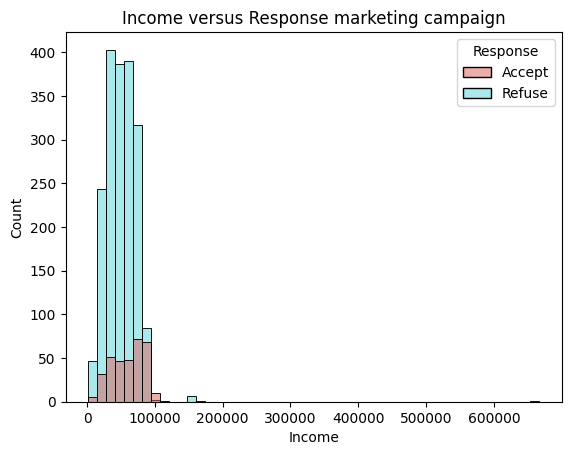

In [61]:
ax =sns.histplot(df, x='Income', hue='Response', palette='hls', bins=50)
ax.set_title('Income versus Response marketing campaign')

### 3.8. Age range of people who response the marketing campaign

In [63]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [64]:
df['Age'] = 2024 - df['Year_Birth']

In [66]:
df[df['Age'] > 100].Age.values

array([131, 125, 124], dtype=int64)

In [67]:
df = df.drop(df[df['Age'] > 100].index)
df.shape

(2213, 23)

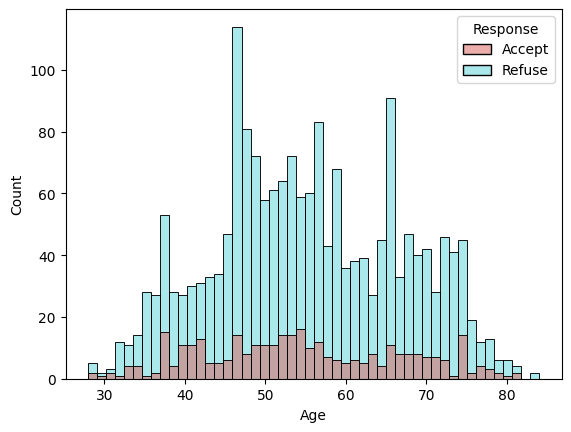

In [70]:
ax = sns.histplot(df, x='Age', hue='Response', palette='hls', bins=50)

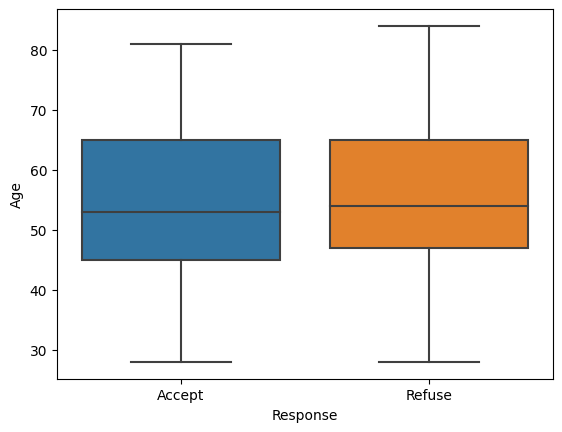

In [71]:
ax = sns.boxplot(df, x='Response', y='Age')

In [72]:
trans_data = data[data.Year_Birth>1924].copy()

## 4. Model

### 4.1. Response Correlation 

In [75]:
trans_data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
Edu_level = LabelEncoder()
Marital_Status_level =LabelEncoder()

In [76]:
trans_data['Education'] = Edu_level.fit_transform(trans_data['Education'])
trans_data['Marital_Status'] = Marital_Status_level.fit_transform(trans_data['Marital_Status'])

In [77]:
trans_data.drop('Id', axis = 1, inplace = True)
trans_data.drop('Dt_Customer', axis = 1, inplace = True)
trans_data.drop('MntWines', axis = 1, inplace = True)

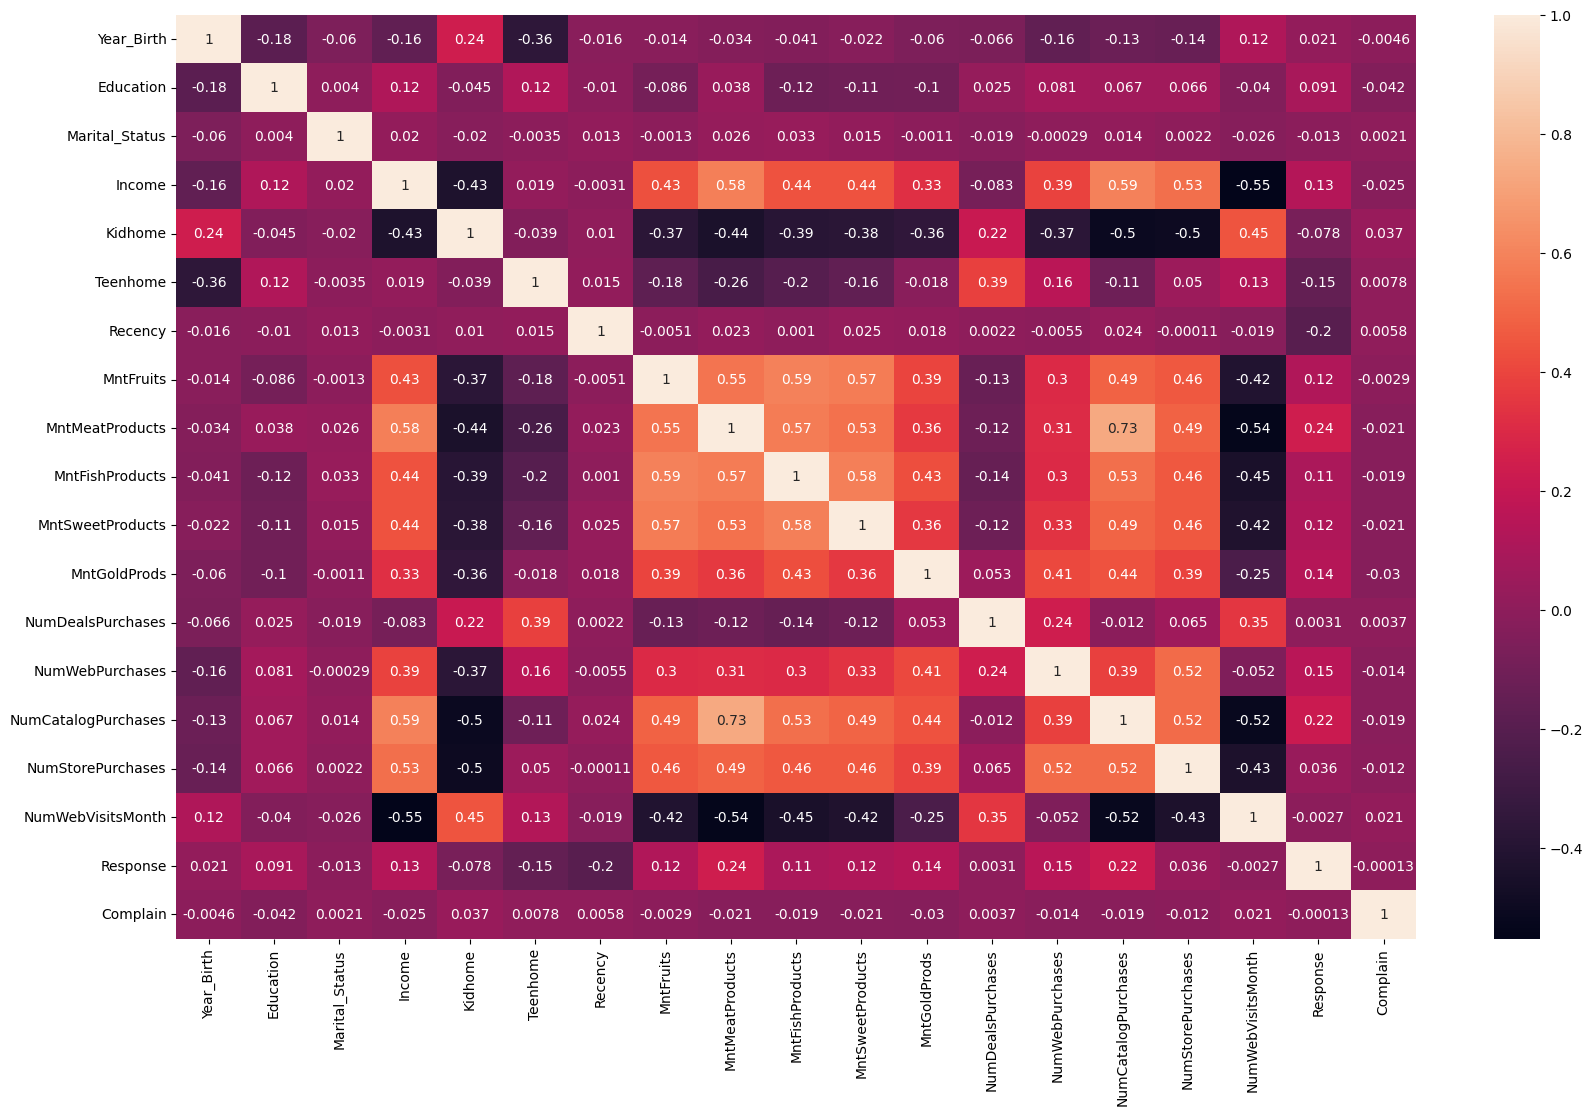

In [79]:
plt.figure(figsize=(20,12))
sns.heatmap(trans_data.corr(), annot = True)
plt.show()

In [80]:
trans_data.corr()['Response']

Year_Birth             0.020803
Education              0.090506
Marital_Status        -0.012686
Income                 0.133302
Kidhome               -0.078076
Teenhome              -0.154189
Recency               -0.199899
MntFruits              0.123059
MntMeatProducts        0.238059
MntFishProducts        0.108227
MntSweetProducts       0.116165
MntGoldProds           0.141196
NumDealsPurchases      0.003060
NumWebPurchases        0.151148
NumCatalogPurchases    0.219996
NumStorePurchases      0.035720
NumWebVisitsMonth     -0.002678
Response               1.000000
Complain              -0.000127
Name: Response, dtype: float64

### 4.2. Logistic Regression

In [81]:
x = trans_data.drop('Response', axis = 1)
y = trans_data['Response']

In [88]:
import warnings
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report

In [93]:
!pip install imbalanced-learn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
sm = SMOTE(sampling_strategy='minority')
x_sm, y_sm = sm.fit_resample(x,y)

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)

In [96]:
from sklearn.linear_model import LogisticRegression

In [99]:
lr = LogisticRegression(C=13, max_iter=500, penalty = 'l2')

In [100]:
lr.fit(x_train, y_train)

LogisticRegression(C=13, max_iter=500)

In [101]:
lr.score(x_train, y_train)

0.7493351063829787

In [102]:
lr.score(x_test, y_test)

0.7539893617021277

In [107]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       377
           1       0.75      0.77      0.76       375

    accuracy                           0.75       752
   macro avg       0.75      0.75      0.75       752
weighted avg       0.75      0.75      0.75       752



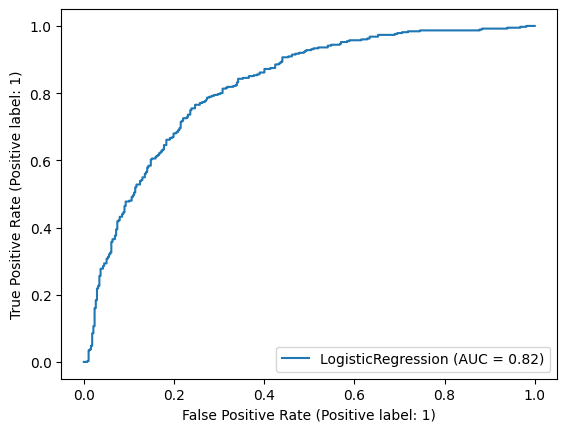

In [113]:
RocCurveDisplay.from_estimator(lr, x_test, y_test)